<a href="https://colab.research.google.com/github/rocket0l4/feature-scaling/blob/main/Normalization(MinMax).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/content/drive/MyDrive/wine.data',header=None,usecols=[0,1,2])
df.columns = ['Class label','Alchol','Malic Acid']

In [11]:
df

,Class label,Alchol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alchol', ylabel='Density'>

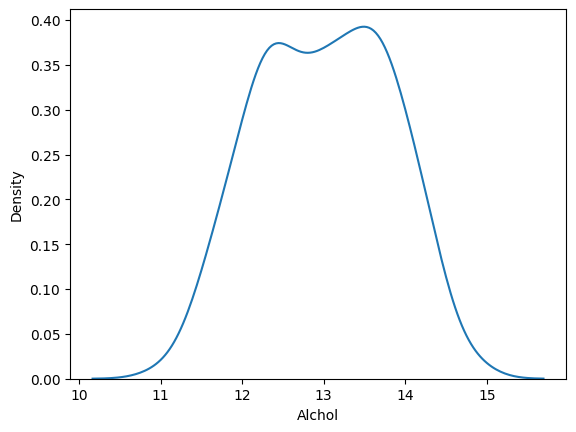

In [13]:
sns.kdeplot(df["Alchol"])

<Axes: xlabel='Malic Acid', ylabel='Density'>

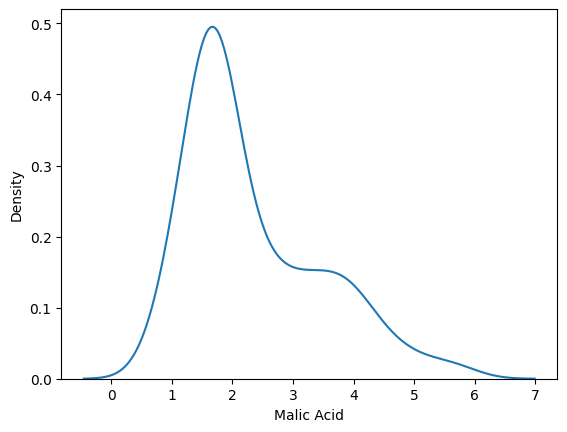

In [15]:
sns.kdeplot(df['Malic Acid'])

#Scatter-Plot

<Axes: xlabel='Alchol', ylabel='Malic Acid'>

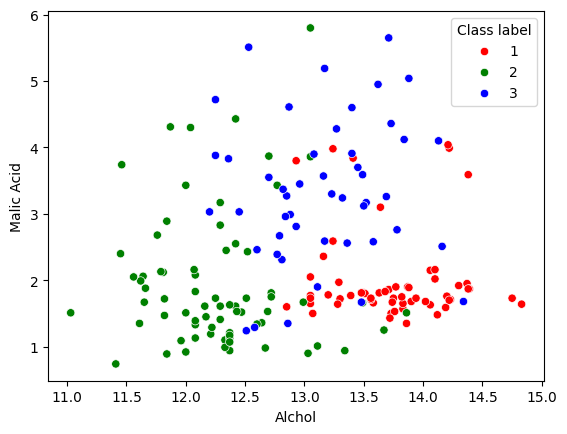

In [23]:
color_dict={1:'red',3:'blue',2:'green'}
sns.scatterplot(data = df,y ='Malic Acid',x = 'Alchol',hue='Class label',palette= color_dict)

#Train Test split

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class label',axis = 1),
                                                 df['Class label'],
                                                 test_size=0.3,
                                                 random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

#For MinMax

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fit the scaler to the train set.it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled  = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [33]:
np.round(X_train.describe(),0)

,Alchol,Malic Acid
count,124.0,124.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


In [31]:
np.round(X_train_scaled.describe(),1)

,Alchol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


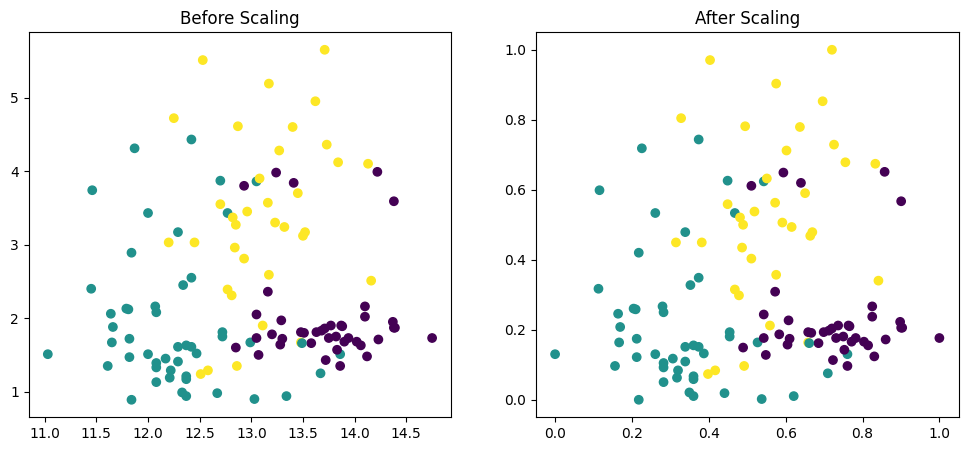

In [34]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alchol'],X_train['Malic Acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alchol'],X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='Alchol', ylabel='Density'>

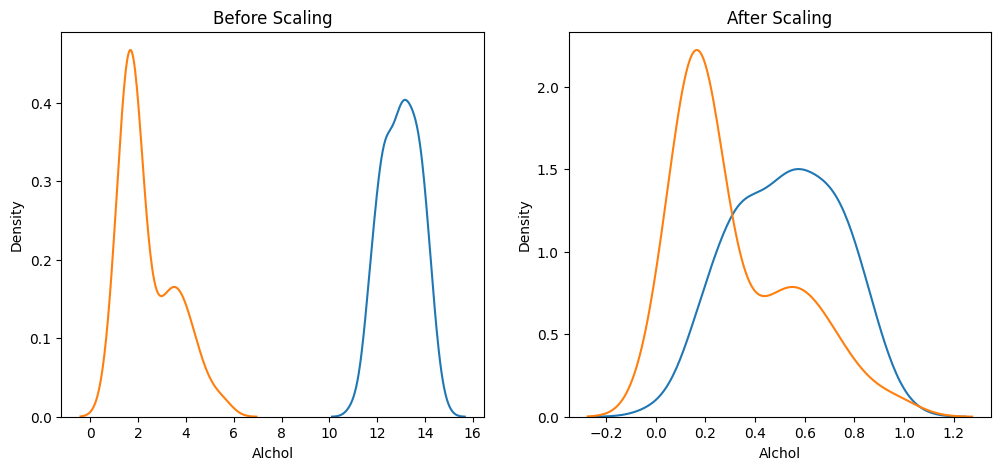

In [35]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# ax1.scatter(X_train['Alchol'],X_train['Malic Acid'],c=y_train)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alchol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)

# ax2.scatter(X_train_scaled['Alchol'],X_train_scaled['Malic Acid'],c=y_train)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alchol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)



<Axes: title={'center': 'Alchol Distribution After Scaling'}, xlabel='Alchol', ylabel='Density'>

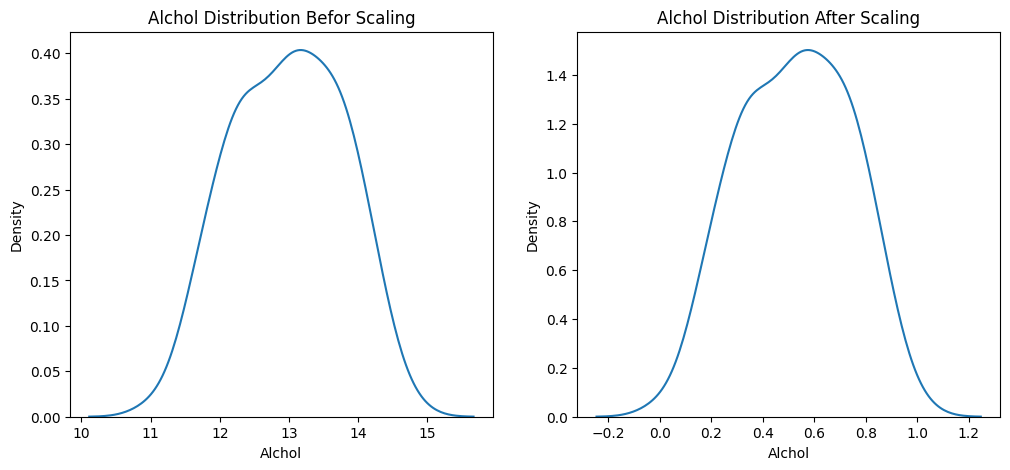

In [36]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# ax1.scatter(X_train['Alchol'],X_train['Malic Acid'],c=y_train)
ax1.set_title('Alchol Distribution Befor Scaling')
sns.kdeplot(X_train['Alchol'],ax=ax1)
# sns.kdeplot(X_train['Malic Acid'],ax=ax1)

# ax2.scatter(X_train_scaled['Alchol'],X_train_scaled['Malic Acid'],c=y_train)

ax2.set_title('Alchol Distribution After Scaling')
sns.kdeplot(X_train_scaled['Alchol'],ax=ax2)
# sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)

<Axes: title={'center': 'Malic Acid Distribution After Scaling'}, xlabel='Malic Acid', ylabel='Density'>

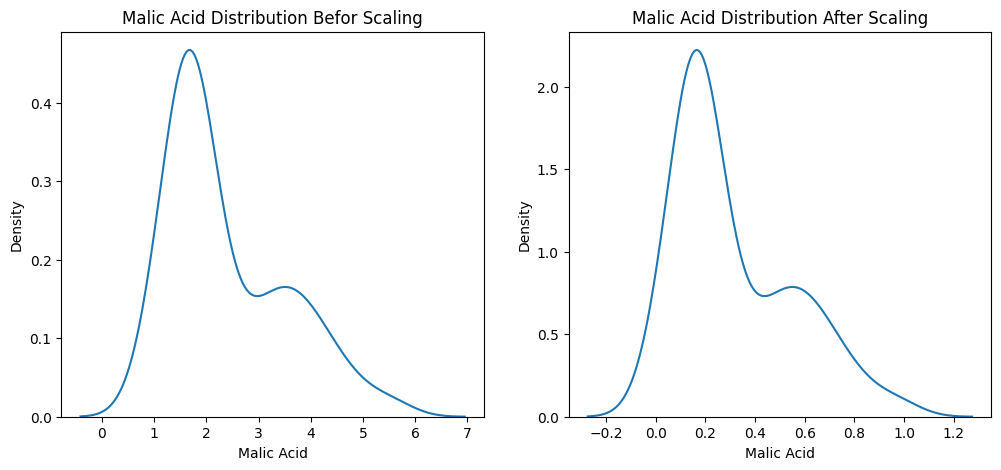

In [37]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# ax1.scatter(X_train['Alchol'],X_train['Malic Acid'],c=y_train)
ax1.set_title('Malic Acid Distribution Befor Scaling')
sns.kdeplot(X_train['Malic Acid'],ax=ax1)
# sns.kdeplot(X_train['Malic Acid'],ax=ax1)

# ax2.scatter(X_train_scaled['Alchol'],X_train_scaled['Malic Acid'],c=y_train)

ax2.set_title('Malic Acid Distribution After Scaling')
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)
# sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)